In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

# Import API key
from config import apikey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=15)
lngs = np.random.uniform(low=-180.000, high=180.000, size=15)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

14

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = apikey

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


In [18]:
citydf=pd.DataFrame({"City":[]})
citydf["City"]=cities
print("Beginning Date Retrieval\n\
---------------------------")
for index,row in citydf.iterrows():
    surl=url+"&q="+row["City"]
    response=requests.get(surl).json()
    print(f'Processing Rerord {index % 50} of set {1+index//50} | {row["City"]}\n\
    {str(surl)}') 
    try:
        citydf.loc[index,"Cloudiness"]=response["clouds"]["all"]
    except:
        pass
    try:
        citydf.loc[index,"Country"]=response["sys"]["country"]
    except:
        pass
    try:
        citydf.loc[index,"Cloudiness"]=response["clouds"]["all"]
    except:
        pass
    try:
        citydf.loc[index,"Date"]=response["dt"]
    except:
        pass
    try:
        citydf.loc[index,"Humidity"]=response["main"]["humidity"]
    except:
        pass
    try:
        citydf.loc[index,"Lat"]=response["coord"]["lat"]
    except:
        pass
    try:
        citydf.loc[index,"Lat"]=response["coord"]["lat"]
    except:
        pass
    try:
        citydf.loc[index,"Lng"]=response["coord"]["lon"]
    except:
        pass
    try:
        citydf.loc[index,"Max Temp"]=response["main"]["temp_max"]
    except:
        pass
    try:
        citydf.loc[index,"Wind Speed"]=response["wind"]["speed"]
    except:
        pass
citydf=citydf.dropna(how="any")

Beginning Date Retrieval
---------------------------
Processing Rerord 0 of set 1 | butaritari
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=424724647d94ea0dc593acb9551fb094&q=butaritari
Processing Rerord 1 of set 1 | torbay
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=424724647d94ea0dc593acb9551fb094&q=torbay
Processing Rerord 2 of set 1 | fairbanks
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=424724647d94ea0dc593acb9551fb094&q=fairbanks
Processing Rerord 3 of set 1 | cockburn town
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=424724647d94ea0dc593acb9551fb094&q=cockburn town
Processing Rerord 4 of set 1 | mrirt
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=424724647d94ea0dc593acb9551fb094&q=mrirt
Processing Rerord 5 of set 1 | klaksvik
    http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=424724647d94ea0dc593acb9551fb094&q=klaksvik
Proce

In [19]:
citydf.count()

City          12
Cloudiness    12
Country       12
Date          12
Humidity      12
Lat           12
Lng           12
Max Temp      12
Wind Speed    12
dtype: int64

In [21]:
citydf.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,butaritari,56.0,KI,1.547159e+09,99.0,3.07,172.79,85.34,9.31
1,torbay,90.0,CA,1.547158e+09,100.0,47.66,-52.73,39.20,8.05
2,fairbanks,40.0,US,1.547157e+09,73.0,64.84,-147.72,-22.01,3.36
3,cockburn town,56.0,TC,1.547159e+09,100.0,21.46,-71.14,76.48,8.86
5,klaksvik,64.0,FO,1.547157e+09,87.0,62.23,-6.59,46.40,16.11


In [7]:
citydf.to_csv("cityweather.csv",index=False,header=True)

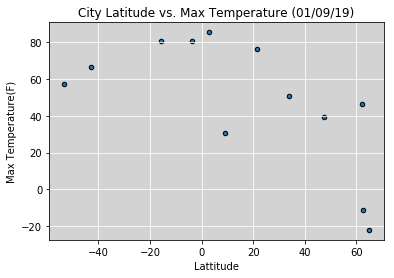

In [43]:
latemp=citydf.plot(kind="scatter",x="Lat",y="Max Temp",facecolors="blue",edgecolors="black",title="City Latitude vs. Max Temperature (01/09/19)")
latemp.set_facecolor("lightgrey")
latemp.grid(color="white")
latemp.set_xlabel("Lattitude")
latemp.set_ylabel("Max Temperature(F)")
plt.savefig("temperature.png")

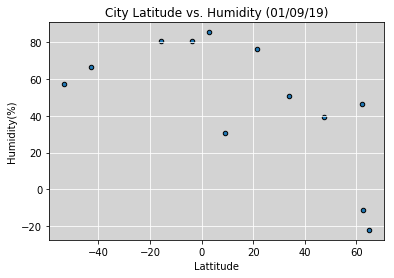

In [44]:
lathum=citydf.plot(kind="scatter",x="Lat",y="Max Temp",facecolors="blue",edgecolors="black",title="City Latitude vs. Humidity (01/09/19)")
lathum.set_facecolor("lightgrey")
lathum.grid(color="white")
lathum.set_xlabel("Lattitude")
lathum.set_ylabel("Humidity(%)")
plt.savefig("humidity.png")



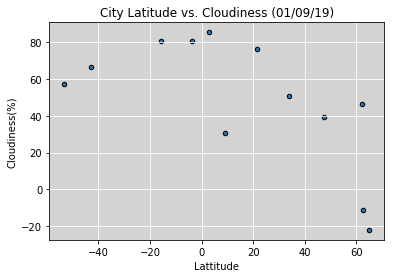

In [45]:
latcloud=citydf.plot(kind="scatter",x="Lat",y="Max Temp",facecolors="blue",edgecolors="black",title="City Latitude vs. Cloudiness (01/09/19)")
latcloud.set_facecolor("lightgrey")
latcloud.grid(color="white")
latcloud.set_xlabel("Lattitude")
latcloud.set_ylabel("Cloudiness(%)")
plt.savefig("humidity.png")


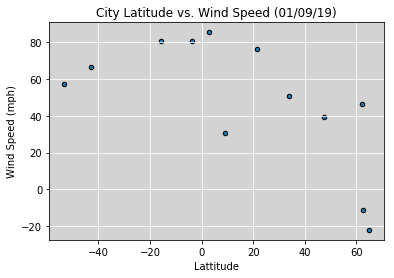

In [46]:
latcloud=citydf.plot(kind="scatter",x="Lat",y="Max Temp",facecolors="blue",edgecolors="black",title="City Latitude vs. Wind Speed (01/09/19)")
latcloud.set_facecolor("lightgrey")
latcloud.grid(color="white")
latcloud.set_xlabel("Lattitude")
latcloud.set_ylabel("Wind Speed (mph)")
plt.savefig("windspeed.png")

